# Setup

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
def load_and_average_on_keys(file, keys):
    df = pd.read_csv(file)



    df = df.groupby(keys, as_index=False).mean()
    
    df.drop(["try", "setuptime", "teardowntime"], axis=1, inplace=True)

    return df

# Files
files = {
    "sequencial_raw": "sequencial_raw.csv",
    "sequencial": "sequencial.csv",
    "parallel_omp": "parallel-omp.csv",
    "parallel_cuda": "parallel-cuda.csv",
    "parallel_mpi": "parallel-mpi.csv"
}

# Load dataframes
seq_raw = load_and_average_on_keys(files["sequencial_raw"], ["grid_size","iterations"])
seq_opt = load_and_average_on_keys(files["sequencial"], ["grid_size","iterations"])
parallel_omp = load_and_average_on_keys(files["parallel_omp"], ["grid_size","iterations", "thread"])
parallel_cuda = load_and_average_on_keys(files["parallel_cuda"], ["grid_size","iterations", "block_size"])
parallel_mpi = load_and_average_on_keys(files["parallel_mpi"], ["grid_size","iterations", "processes"])




# Gráficos de Otimização em Compilação

In [131]:
# plt.figure(figsize=(10, 6))

# for grid_size in seq_raw["iterations"].unique():
#     raw_subset = seq_raw[seq_raw["iterations"] == grid_size]
#     opt_subset = seq_opt[seq_opt["iterations"] == grid_size]
#     plt.plot(raw_subset["grid_size"], raw_subset["runtime"] / opt_subset["runtime"], label=f"Tamanho da Matriz {grid_size}", marker='o')

# plt.xlabel("Iterações")
# plt.ylabel("Speedup")
# plt.title("Gráfico de Speedup: Algoritmo Base vs Otimização de Compilador")
# plt.grid()
# plt.legend()
# plt.show()

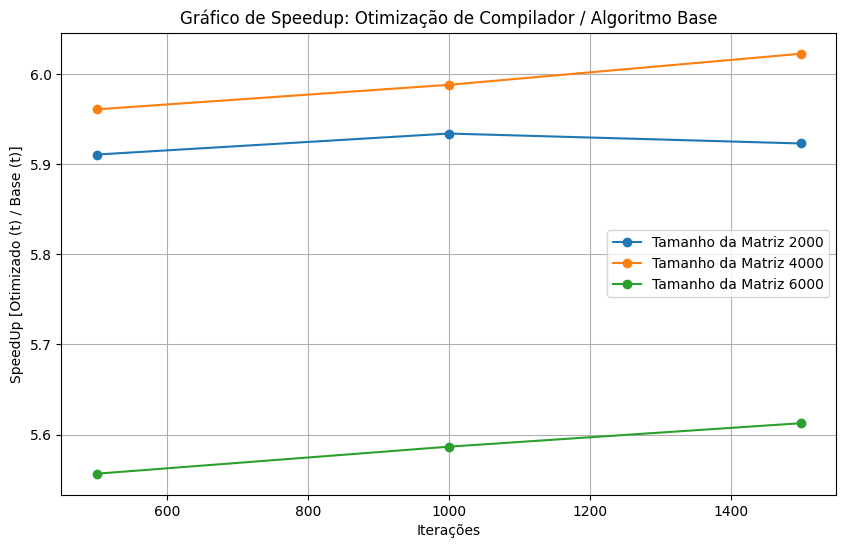

In [132]:
plt.figure(figsize=(10, 6))

for grid_size in seq_raw["grid_size"].unique():
    raw_subset = seq_raw[seq_raw["grid_size"] == grid_size]
    opt_subset = seq_opt[seq_opt["grid_size"] == grid_size]
    plt.plot(raw_subset["iterations"], raw_subset["runtime"] / opt_subset["runtime"], label=f"Tamanho da Matriz {grid_size}", marker='o')

plt.xlabel("Iterações")
plt.ylabel("SpeedUp [Otimizado (t) / Base (t)]")
plt.title("Gráfico de Speedup: Otimização de Compilador / Algoritmo Base")
plt.grid()
plt.legend()
plt.show()

# Gráficos OpenMP

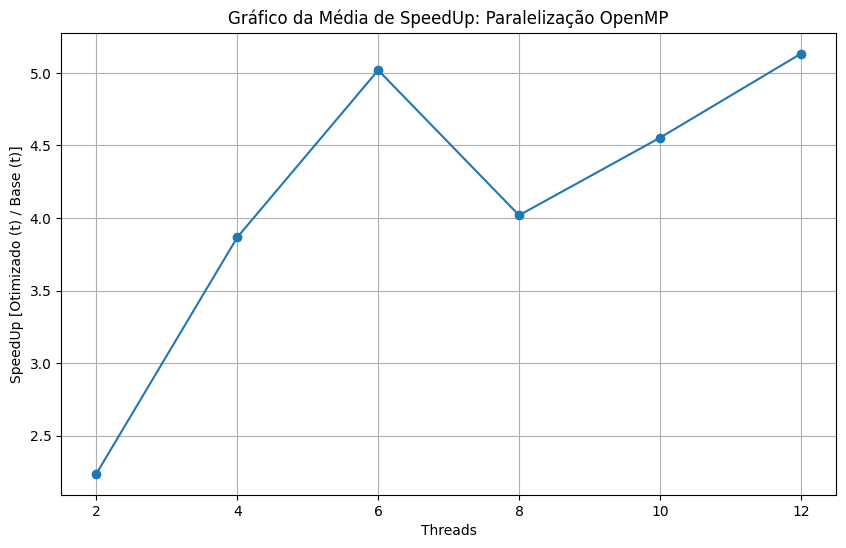

In [133]:
plt.figure(figsize=(10, 6))

data = parallel_omp[parallel_omp['grid_size'] == 6000].reset_index()
raw_subset = seq_raw[seq_raw["grid_size"] == 6000].reset_index()

average = []

for threads in data["thread"].unique():
    mpi_subset = data[data["thread"] == threads].reset_index()
    
    speedup =  raw_subset["runtime"] / mpi_subset["runtime"]

    performance:pd.Series = speedup
    
    average.append(performance.mean())

plt.plot(data['thread'].unique(), average, marker='o')

plt.xlabel("Threads")
plt.ylabel("SpeedUp [Otimizado (t) / Base (t)]")
plt.title("Gráfico da Média de SpeedUp: Paralelização OpenMP")
plt.grid()
plt.show()


In [134]:
# mpi_12_threads = parallel_omp[parallel_omp["thread"] == 12]

# plt.figure(figsize=(10, 6))

# for grid_size in mpi_12_threads["grid_size"].unique():

#     mpi_subset = mpi_12_threads[mpi_12_threads["grid_size"] == grid_size].reset_index()
#     raw_subset = seq_raw[seq_raw["grid_size"] == grid_size].reset_index()

#     plt.plot(mpi_subset["iterations"], raw_subset["runtime"] / mpi_subset["runtime"], label=f"Tamanho da Matriz {grid_size}", marker='o')

# plt.xlabel("Iterações")
# plt.ylabel("Speedup")
# plt.title("Gráfico de Speedup: Paralelizado OMP (12 threads) vs Algoritmo Base")
# plt.grid()
# plt.legend()
# plt.show()

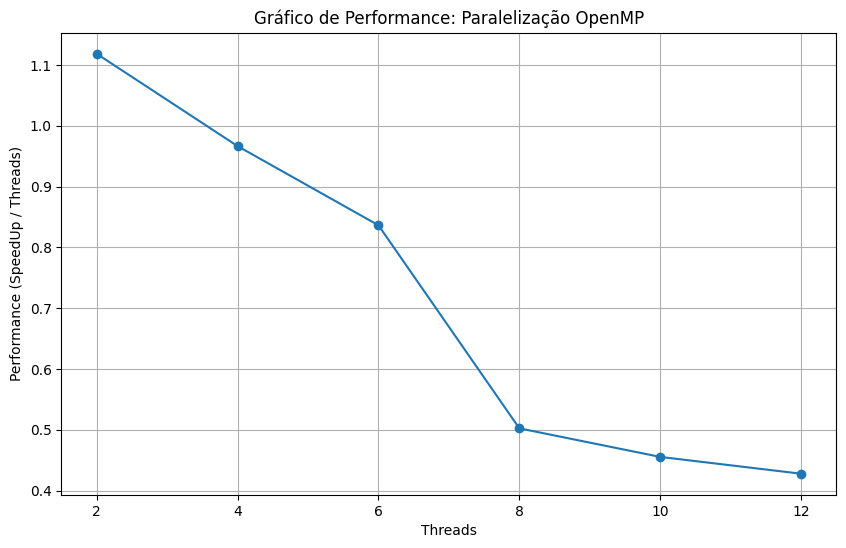

In [135]:
plt.figure(figsize=(10, 6))

data = parallel_omp[parallel_omp['grid_size'] == 6000].reset_index()
raw_subset = seq_raw[seq_raw["grid_size"] == 6000].reset_index()

average = []

for threads in data["thread"].unique():
    mpi_subset = data[data["thread"] == threads].reset_index()
    
    speedup =  raw_subset["runtime"] / mpi_subset["runtime"]

    performance:pd.Series = speedup / threads
    
    average.append(performance.mean())

plt.plot(data['thread'].unique(), average, label=f"Threads", marker='o')

plt.xlabel("Threads")
plt.ylabel("Performance (SpeedUp / Threads)")
plt.title("Gráfico de Performance: Paralelização OpenMP")
plt.grid()
plt.show()


# Gráficos OpenMPI

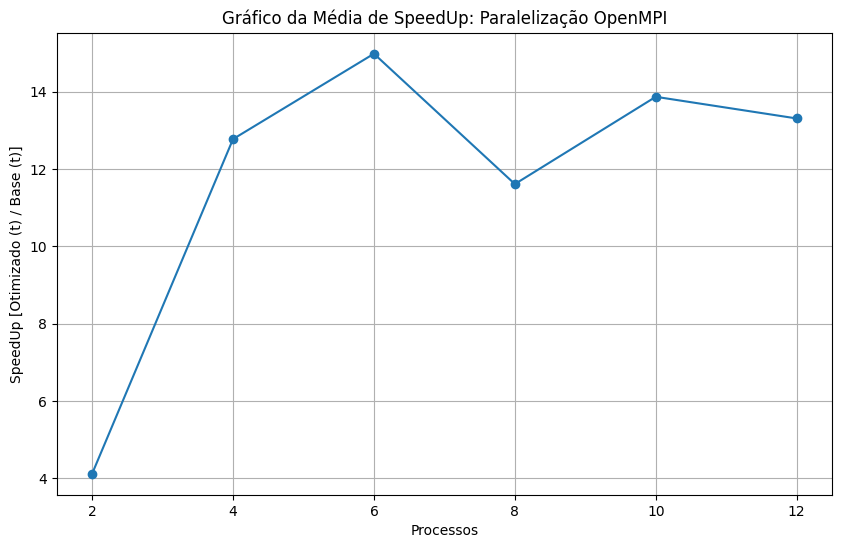

In [136]:
plt.figure(figsize=(10, 6))

data = parallel_mpi[parallel_mpi['grid_size'] == 6000].reset_index()
raw_subset = seq_raw[seq_raw["grid_size"] == 6000].reset_index()

average = []

for threads in data["processes"].unique():
    mpi_subset = data[data["processes"] == threads].reset_index()
    
    speedup =  raw_subset["runtime"] / mpi_subset["runtime"]

    performance:pd.Series = speedup
    
    average.append(performance.mean())

plt.plot(data['processes'].unique(), average, marker='o')

plt.xlabel("Processos")
plt.ylabel("SpeedUp [Otimizado (t) / Base (t)]")
plt.title("Gráfico da Média de SpeedUp: Paralelização OpenMPI")
plt.grid()
plt.show()


In [137]:
# mpi_12_threads = parallel_mpi[parallel_mpi["processes"] == 6]

# plt.figure(figsize=(10, 6))

# for grid_size in mpi_12_threads["grid_size"].unique():

#     mpi_subset = mpi_12_threads[mpi_12_threads["grid_size"] == grid_size].reset_index()
#     raw_subset = seq_raw[seq_raw["grid_size"] == grid_size].reset_index()

#     plt.plot(mpi_subset["iterations"], raw_subset["runtime"] / mpi_subset["runtime"], label=f"Tamanho da Matriz {grid_size}", marker='o')

# plt.xlabel("Iterações")
# plt.ylabel("Speedup")
# plt.title("Gráfico de Speedup: Paralelizado OpenMPI (6 threads) vs Algoritmo Base")
# plt.grid()
# plt.legend()
# plt.show()

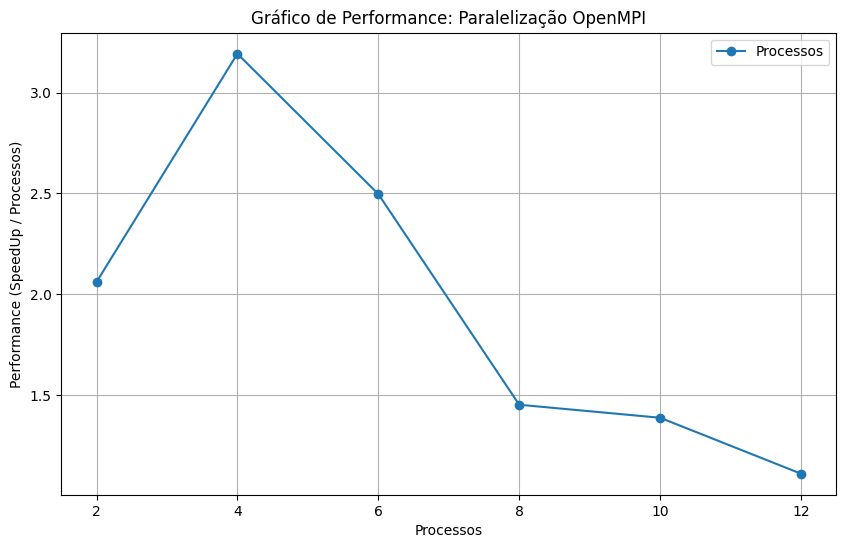

In [138]:
plt.figure(figsize=(10, 6))

data = parallel_mpi[parallel_mpi['grid_size'] == 6000].reset_index()
raw_subset = seq_raw[seq_raw["grid_size"] == 6000].reset_index()

average = []

for threads in data["processes"].unique():
    mpi_subset = data[data["processes"] == threads].reset_index()
    
    speedup =  raw_subset["runtime"] / mpi_subset["runtime"]

    performance:pd.Series = speedup / threads
    
    average.append(performance.mean())

plt.plot(data['processes'].unique(), average, label=f"Processos", marker='o')

plt.xlabel("Processos")
plt.ylabel("Performance (SpeedUp / Processos)")
plt.title("Gráfico de Performance: Paralelização OpenMPI")
plt.legend()
plt.grid()
plt.show()


# Gráficos CUDA


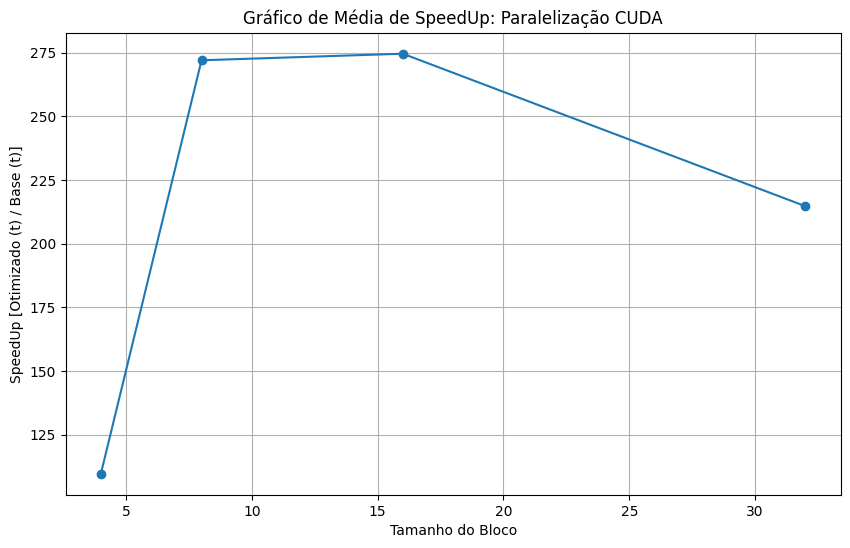

In [139]:
plt.figure(figsize=(10, 6))

data = parallel_cuda[parallel_cuda['grid_size'] == 2000].reset_index()
raw_subset = seq_raw[seq_raw["grid_size"] == 2000].reset_index()

average = []

for threads in data["block_size"].unique():
    cuda_subset = data[data["block_size"] == threads].reset_index()
    
    speedup =  raw_subset["runtime"] / cuda_subset["runtime"]

    performance:pd.Series = speedup
    
    average.append(performance.mean())

plt.plot(data['block_size'].unique(), average, marker='o')

plt.xlabel("Tamanho do Bloco")
plt.ylabel("SpeedUp [Otimizado (t) / Base (t)]")
plt.title("Gráfico de Média de SpeedUp: Paralelização CUDA")
plt.grid()
plt.show()


In [140]:
# cuda_8_block = parallel_cuda[parallel_cuda["block_size"] == 8]

# plt.figure(figsize=(10, 6))
# for grid_size in cuda_8_block["grid_size"].unique():
#     cuda_subset = cuda_8_block[cuda_8_block["grid_size"] == grid_size].reset_index()

#     plt.plot(cuda_subset["iterations"], cuda_subset["runtime"], label=f"Tamanho da Matriz {grid_size}", marker='o')
    
#     raw_subset = seq_raw[seq_raw["grid_size"] == grid_size].reset_index()
    
#     if len(raw_subset.index) > 0:
#         plt.plot(raw_subset["iterations"], raw_subset["runtime"], label=f"Tamanho da Matriz {grid_size}", marker='o')

# plt.xlabel("Iterações")
# plt.ylabel("SpeedUp")
# plt.title("Gráfico de SpeedUp: Paralelização CUDA (Tamanho do Bloco em 8) vs Código Sem Otimização")
# plt.legend()
# plt.yscale('log')
# plt.grid()
# plt.show()

In [141]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=parallel_cuda, x="block_size", y="runtime")
# plt.xlabel("Tamanho do Bloco")
# plt.ylabel("Tempo de Execução")
# plt.grid()
# plt.title("Boxplot: Tempo de Execução vs Tamanho do Bloco (CUDA)")
# plt.show()

# Conclusão


In [142]:
# plt.figure(figsize=(10, 6))
# grid_size_2000 = 2000

# seq_raw_subset = seq_raw[seq_raw["grid_size"] == grid_size_2000]
# seq_opt_subset = seq_opt[seq_opt["grid_size"] == grid_size_2000]

# mpi_subset = parallel_omp[parallel_omp["grid_size"] == grid_size_2000]
# mpi_subset = mpi_subset[mpi_subset['thread'] == 12]

# cuda_subset = parallel_cuda[parallel_cuda["grid_size"] == grid_size_2000]
# cuda_subset = cuda_subset[cuda_subset['block_size'] == 8]
# cuda_subset = cuda_subset[(cuda_subset['iterations'] >= 500) & (cuda_subset['iterations'] < 1600)]

# plt.plot(seq_raw_subset["iterations"], seq_raw_subset["runtime"], label="Sequential Raw", marker="o")
# plt.plot(seq_opt_subset["iterations"], seq_opt_subset["runtime"], label="Sequential Optimized", marker="o")
# plt.plot(mpi_subset["iterations"], mpi_subset["runtime"], label="Parallel OMP", marker="o")
# plt.plot(cuda_subset["iterations"], cuda_subset["runtime"], label="Parallel CUDA", marker="o")

# plt.xlabel("Iterations")
# # plt.yscale("log")
# plt.ylabel("Runtime")
# plt.grid()
# plt.title("Runtime vs Iterations (Grid size 2000)")
# plt.legend()
# plt.show()


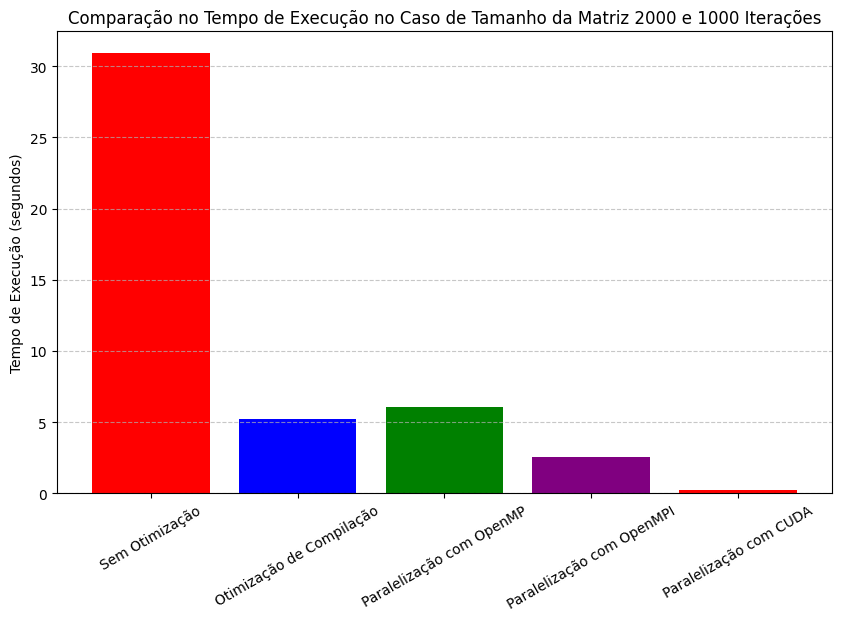

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

grid_size_6000 = 2000

# Subset data for the specified grid size and iterations
seq_raw_subset = seq_raw[(seq_raw["grid_size"] == grid_size_6000) & (seq_raw["iterations"] == 1000)]
seq_opt_subset = seq_opt[(seq_opt["grid_size"] == grid_size_6000) & (seq_opt["iterations"] == 1000)].reset_index()
opm_subset = parallel_omp[(parallel_omp["grid_size"] == grid_size_6000) & (parallel_omp["iterations"] == 1000)]
opm_subset = opm_subset[opm_subset['thread'] == 12].reset_index()
mpi_subset = parallel_mpi[(parallel_omp["grid_size"] == grid_size_6000) & (parallel_omp["iterations"] == 1000)]
mpi_subset = mpi_subset[mpi_subset['processes'] == 12].reset_index()
cuda_subset = parallel_cuda[(parallel_cuda["grid_size"] == grid_size_6000) & (parallel_cuda["iterations"] == 1000)]
cuda_subset = cuda_subset[cuda_subset['block_size'] == 8].reset_index()

# Extract runtime values
runtime_values = [
    seq_raw_subset["runtime"].values[0],
    seq_opt_subset["runtime"].values[0],
    opm_subset["runtime"].values[0],
    mpi_subset["runtime"].values[0],
    cuda_subset["runtime"].values[0]
]

labels = ["Sem Otimização", "Otimização de Compilação", "Paralelização com OpenMP", "Paralelização com OpenMPI", "Paralelização com CUDA"]

# Create bar chart
plt.bar(labels, runtime_values, color=['red', 'blue', 'green', 'purple'])
plt.ylabel('Tempo de Execução (segundos)')
plt.title(f'Comparação no Tempo de Execução no Caso de Tamanho da Matriz {grid_size_6000} e 1000 Iterações')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()